In [ ]:
#pip install simpletransformers
import nltk
#nltk.download('punkt')

     |████████████████████████████████| 249 kB 5.4 MB/s 
     |████████████████████████████████| 4.0 MB 45.9 MB/s 
     |████████████████████████████████| 6.5 MB 35.8 MB/s 
     |████████████████████████████████| 1.2 MB 39.6 MB/s 
     |████████████████████████████████| 325 kB 48.2 MB/s 
     |████████████████████████████████| 10.1 MB 40.0 MB/s 
     |████████████████████████████████| 1.8 MB 37.0 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 596 kB 9.8 MB/s 
     |████████████████████████████████| 144 kB 47.1 MB/s 
     |████████████████████████████████| 181 kB 36.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 136 kB 50.8 MB/s 
     |████████████████████████████████| 212 kB 44.5 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
     |███████████████

In [2]:
import nltk
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize
import string
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#vader_model = SentimentIntensityAnalyzer()
#nlp = spacy.load('en_core_web_sm') # 'en_core_web_sm'

In [6]:
# lowercase all text
df = pd.read_csv('https://raw.githubusercontent.com/RenskeDiep/TextMining/main/cleaned_data.csv?token=GHSAT0AAAAAABTH2RICJPUYT7HGMSMMJB5SYSQHVKQ')
df['Text'] = df['Text'].str.lower()
display(df)

,Unnamed: 0,Text,Speaker
0,0,there's nothing to tell! he's just some guy i...,monica
1,1,"c'mon, you're going out with the guy! there's...",joey
2,2,so does he have a hump? a hump and a hairpiece?,chandler
3,3,"wait, does he eat chalk?",phoebe
4,4,"just, 'cause, i don't want her to go through ...",phoebe
...,...,...,...
52557,52557,"no, no, no, no, no!",rachel
52558,52558,"no, no, no, no, no!",phoebe
52559,52559,"no, no, no, no, no!",joey
52560,52560,"no, no, no, no, no!",chandler


In [7]:

# Text per person, tokenized
monica_text=[]
chandler_text=[]
joey_text=[]
phoebe_text=[]
rachel_text=[]
ross_text=[]
for i in range(1,len(df)):
    text = df["Text"][i]
    tokenized_text = nltk.word_tokenize(text)  #tokenize text
    #clean tokenized text
    table = {ord(char): '' for char in string.punctuation} 
    cleaned_messy_sentence = []
    for messy_word in tokenized_text:   
        cleaned_word = messy_word.translate(table) # the translate method allows us to remove all unwanted charachters
        cleaned_messy_sentence.append(cleaned_word)
    cleaned_sentence = [token for token in cleaned_messy_sentence if token != ''] 
    cleaned_messy_sentence =[]
    
    speaker = df["Speaker"][i]
    if speaker == "monica":
        monica_text.append(cleaned_sentence)
    elif speaker == "chandler":
        chandler_text.append(cleaned_sentence)
    elif speaker == "joey":
        joey_text.append(cleaned_sentence)
    elif speaker == "phoebe":
        phoebe_text.append(cleaned_sentence)
    elif speaker == "rachel":
        rachel_text.append(cleaned_sentence)
    elif speaker == "ross":
        ross_text.append(cleaned_sentence)
    else: 
        print("SOMETHING WENT WRONG!!!")
        break
      
        
print(monica_text)

[['okay', 'everybody', 'relax', 'this', 'is', 'not', 'even', 'a', 'date', 'it', 's', 'just', 'two', 'people', 'going', 'out', 'to', 'dinner', 'and', 'not', 'having', 'sx'], ['are', 'you', 'okay', 'sweetie'], ['carol', 'moved', 'her', 'stuff', 'out', 'today', 'let', 'me', 'get', 'you', 'some', 'coffee'], ['no', 'you', 'do', 'nt'], ['rachel'], ['decaff', 'okay', 'everybody', 'this', 'is', 'rachel', 'another', 'lincoln', 'high', 'survivor', 'this', 'is', 'everybody', 'this', 'is', 'chandler', 'and', 'phoebe', 'and', 'joey', 'and', 'you', 'remember', 'my', 'brother', 'ross'], ['so', 'you', 'wan', 'na', 'tell', 'us', 'now', 'or', 'are', 'we', 'waiting', 'for', 'four', 'wet', 'bridesmaids'], ['who', 'was', 'nt', 'invited', 'to', 'the', 'wedding'], ['now', 'i', 'm', 'guessing', 'that', 'he', 'bought', 'her', 'the', 'big', 'pipe', 'organ', 'and', 'she', 's', 'really', 'not', 'happy', 'about', 'it'], ['well', 'i', 'guess', 'we', 've', 'established', 'who', 's', 'staying', 'here', 'with', 'monic

In [8]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model 
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=32 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase. 
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32 # how often you want to run validation in terms of training steps (or batches)


In [11]:
train_data = []
train_target = []
for i in range(50):
    string = monica_text[i][0]
    #for word in monica_text[i]:
    #    string+= word + ' '
    train_data.append(string)
    train_target.append(0)
    string = rachel_text[i][0]
    #for word in rachel_text[i]:
    #    string+= word + ' '
    train_data.append(string)
    train_target.append(1)
    string = phoebe_text[i][0]
    #for word in phoebe_text[i]:
    #    string+= word + ' '
    train_data.append(string)
    train_target.append(2)
train = pd.DataFrame({'text': train_data, 'labels': train_target})

test_data = []
test_target = []
for i in range(50):
    string = monica_text[i][0]
    #for word in monica_text[i]:
    #    string+= word + ' '
    test_data.append(string)
    test_target.append(0)
    string = rachel_text[i][0]
    #for word in rachel_text[i]:
    #    string+= word + ' '
    test_data.append(string)
    test_target.append(1)
    string = phoebe_text[i][0]
    #for word in phoebe_text[i]:
    #    string+= word + ' '
    test_data.append(string)
    test_target.append(2)
test = pd.DataFrame({'text': test_data, 'labels': test_target})





In [12]:
# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch


Each epoch will have 5 steps.


In [13]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(train, test_size=0.1, random_state=0, 
                               stratify=train[['labels']])


In [40]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args=model_args, use_cuda=False) # CUDA is enabled

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
_, history = model.train_model(train, eval_df=dev) 

  0%|          | 0/135 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

{'mcc': 0.0, 'eval_loss': 1.0616459846496582}

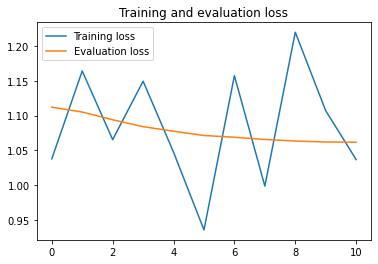

In [17]:
# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()


# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

In [18]:
predicted, probabilities = model.predict(test.text.to_list())
test['predicted'] = predicted

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [22]:
try_to_predict = ['Hi Joey!']
predicted, probabilities = model.predict(try_to_predict)
print(predicted)
print(probabilities)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1]
[[-0.45237207 -0.14954121 -0.16316196]]


In [34]:
# save model
import torch
torch.save(model, './bert_model.pth')
saved_model = torch.load('./Bert_model.pth')


In [39]:
import torch.nn.functional as F
logits = [model.predict(try_to_predict)]
probabilities = F.softmax(logits, dim=-1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: ignored

In [35]:
saved_model.predict(try_to_predict)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

([1], array([[-0.45237207, -0.14954121, -0.16316196]]))